# **Installation and mounting google drive**

We have got a list of URLs from google images using Javascript code in our browser which will save the URLs of all the images we want for our dataset.

We can do this by running the following commands:

urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

Then create directory and upload urls file into our server. And then we need to download our images from their respective urls. We can do this by running the following commands:

download_images(path/file, dest, max_pics=200)

 In this model , we have downloaded the images of both red and all other colors of boats into two different folders named 'red' and 'boat' respectively and saved into google drive

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
from fastai.vision import *

In [0]:
classes = ['boat','red']

In [0]:
!mkdir path1

In [0]:
!cp -r /content/gdrive/My\ Drive/Colab\ Notebooks/red_boat/boat path1/boat

In [0]:
!cp -r /content/gdrive/My\ Drive/Colab\ Notebooks/red_boat/red path1/red

In [0]:
path = Path('path1')

# **View Data**

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [20]:
data.classes

['boat', 'red']

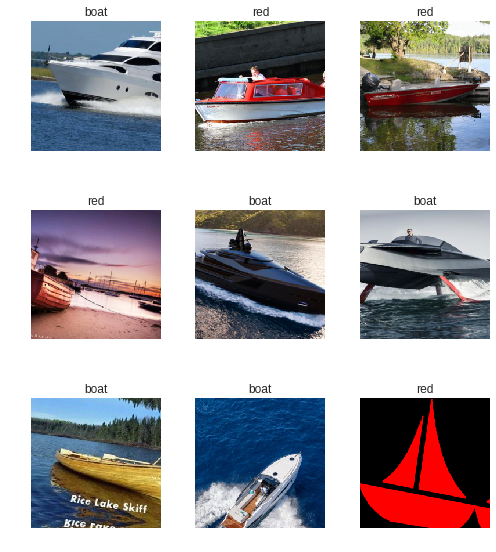

In [21]:
data.show_batch(rows=3, figsize=(7,8))

In [22]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['boat', 'red'], 2, 297, 74)

# **Train Model**

In [0]:
from fastai.vision import learner

In [24]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [25]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (297 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
boat,boat,boat,boat,boat
Path: path1;

Valid: LabelList (74 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
red,boat,boat,red,boat
Path: path1;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu)

In [26]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.039972,0.530867,0.270270,00:09
1,0.770899,0.417958,0.229730,00:07
2,0.616231,0.381784,0.094595,00:07
3,0.507822,0.385628,0.108108,00:07


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


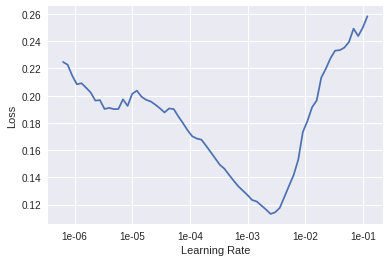

In [31]:
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(3,max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.002783,0.556394,0.081081,00:07
1,0.002993,0.542964,0.081081,00:08
2,0.007223,0.537950,0.081081,00:08


In [0]:
learn.save('stage-2')

# **Interpretation**

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

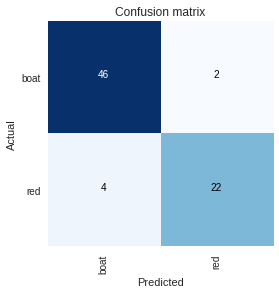

In [51]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
!cp path1/export.pkl /content/gdrive/My\ Drive/Colab\ Notebooks/export_red_boat.pkl

In [0]:
defaults.device = torch.device('cpu')

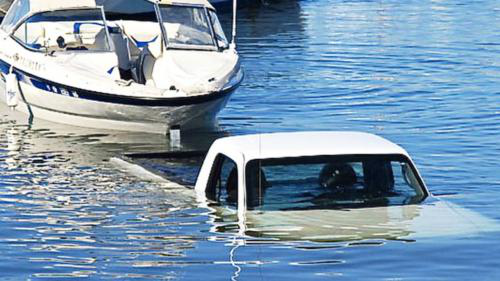

In [66]:
img = open_image(path/'boat'/'00000084.jpg')
img

In [0]:
learn = load_learner(path)

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)

In [57]:
pred_class

Category boat